In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [103]:
data = pd.read_csv('diamonds.csv')
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [104]:
data.drop(columns = ['Unnamed: 0'], inplace = True)

* Этот столбец дублирует индексы(+1), так что он нам не нужен 

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


* Все признаки не имеют пропусков, три обжекта, которые позже преобразуем

In [106]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


* x, y, z - это размер бриллианта, которые уж точно не может быть равен 0, так что выкидываем строчки где хотя бы один из этих признаков - 0

In [108]:
data.drop(data[data['x'] == 0].index, inplace = True)
data.drop(data[data['y'] == 0].index, inplace = True)
data.drop(data[data['z'] == 0].index, inplace = True)

In [109]:
data.duplicated().astype(int).sum()

145

In [110]:
data.drop_duplicates(inplace = True)

* Смотрим, есть ли дублирующиеся строки, они есть, их 145, выкинем их так как они могут плохо повлиять на качество модели

In [111]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [112]:
data.describe()

,carat,depth,table,price,x,y,z
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,61.748232,57.457806,3931.220288,5.731579,5.734909,3.539964
std,0.473169,1.429639,2.233257,3985.918716,1.118611,1.139451,0.702017
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [113]:
def density(column):
    plt.figure(figsize = [15, 5])
    sns.histplot(data = data, x = column, kde = True)
    plt.title(f'density of - {column}', fontsize = 13)
    plt.xlabel('values')
    plt.ylabel('density')
    plt.grid()
    plt.show()

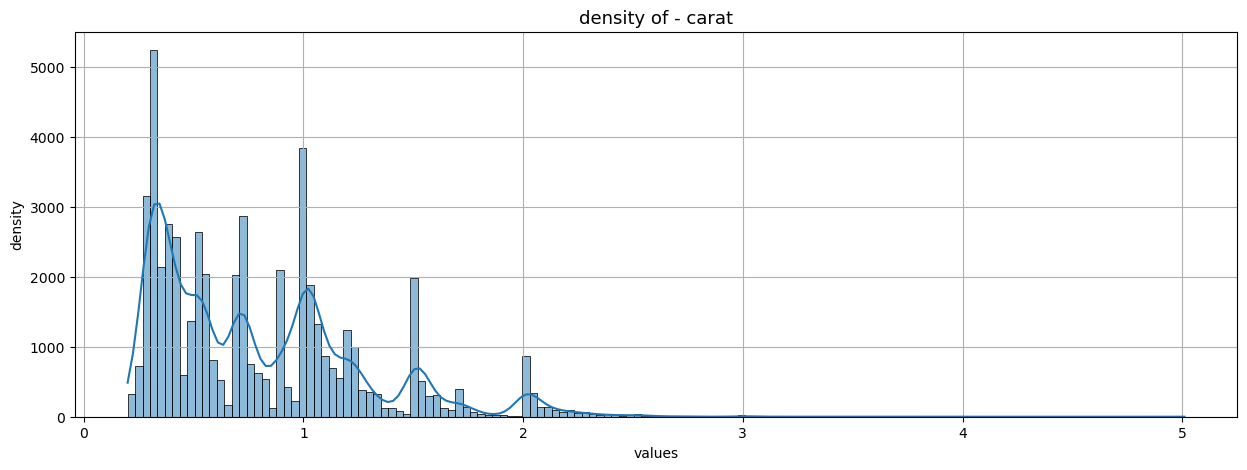

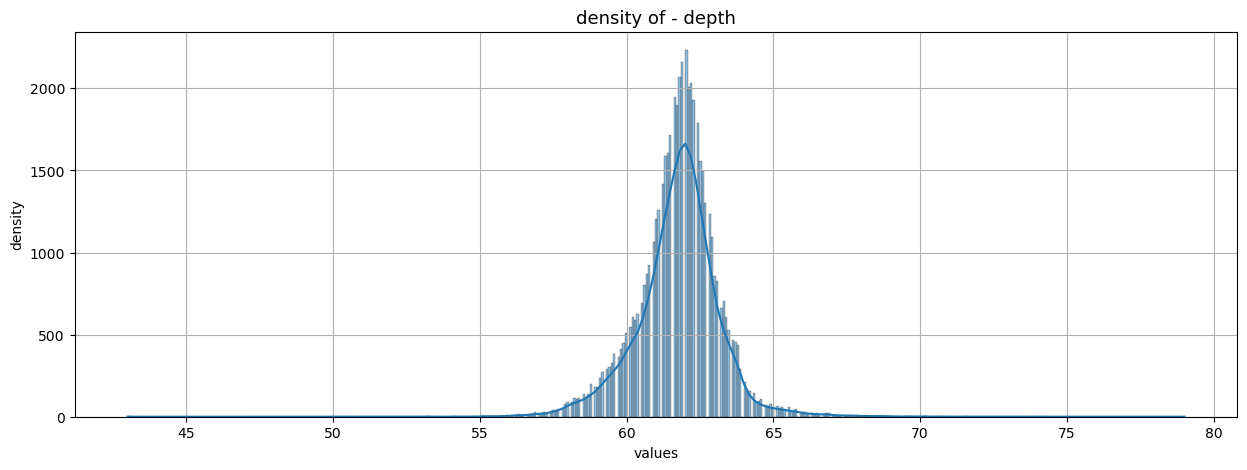

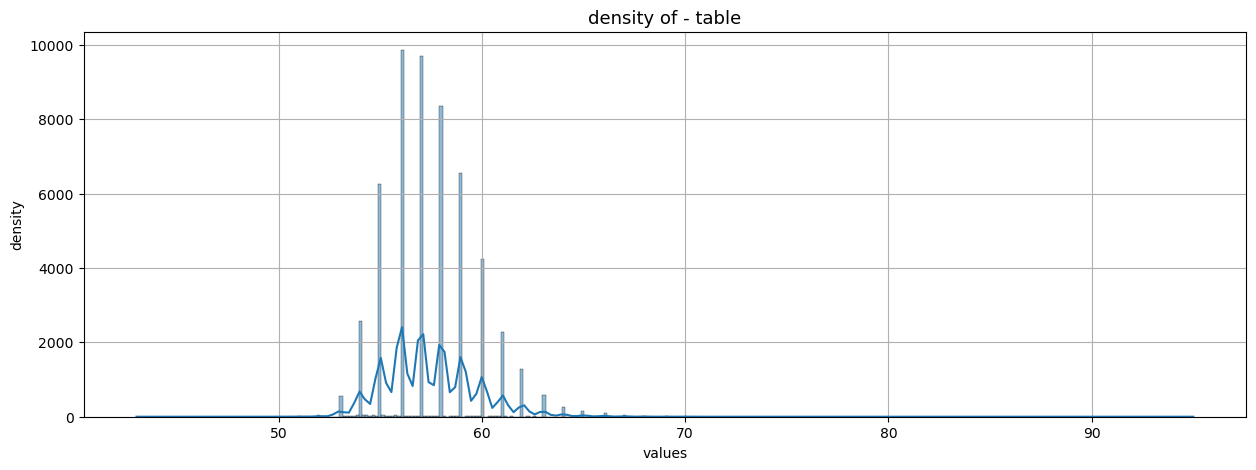

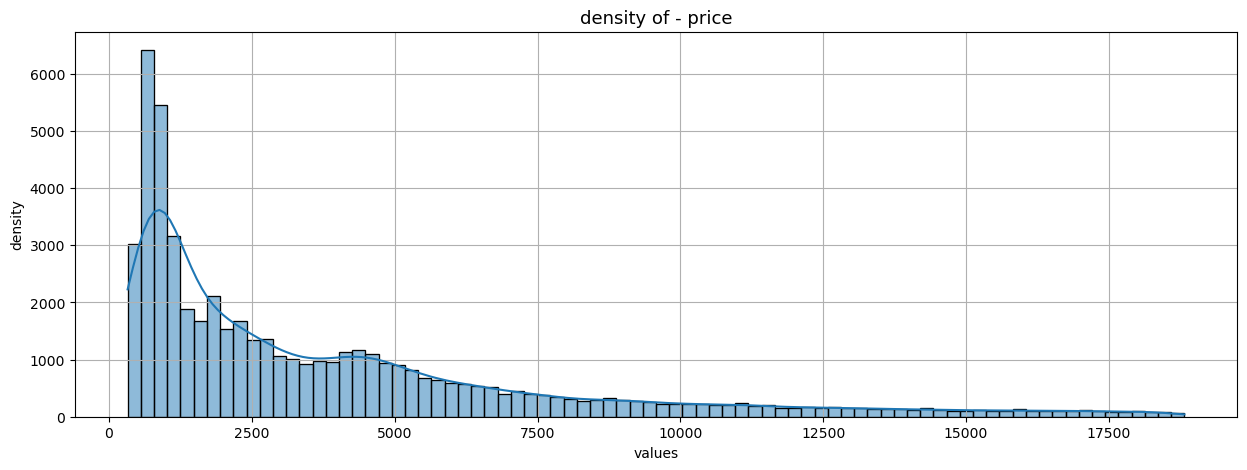

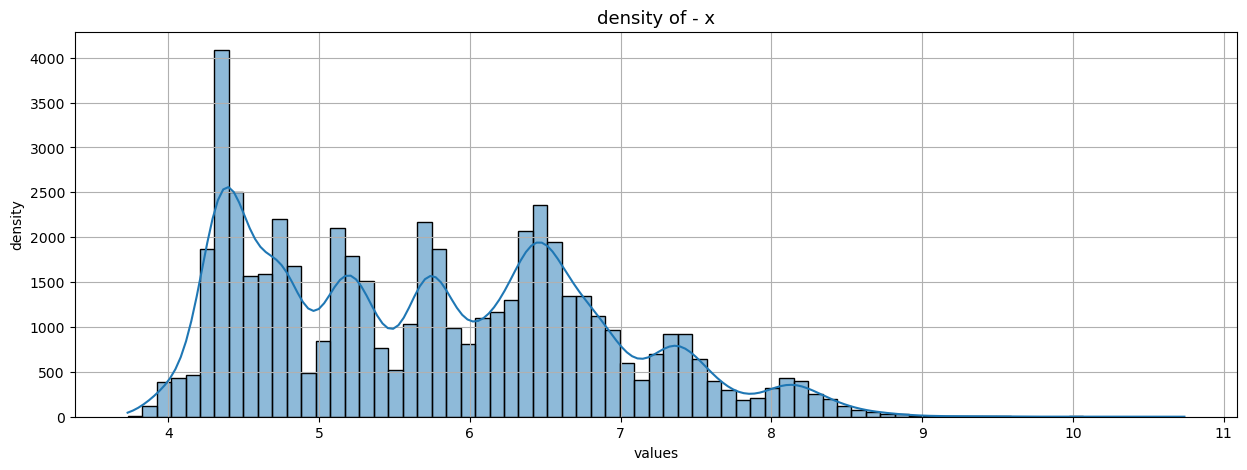

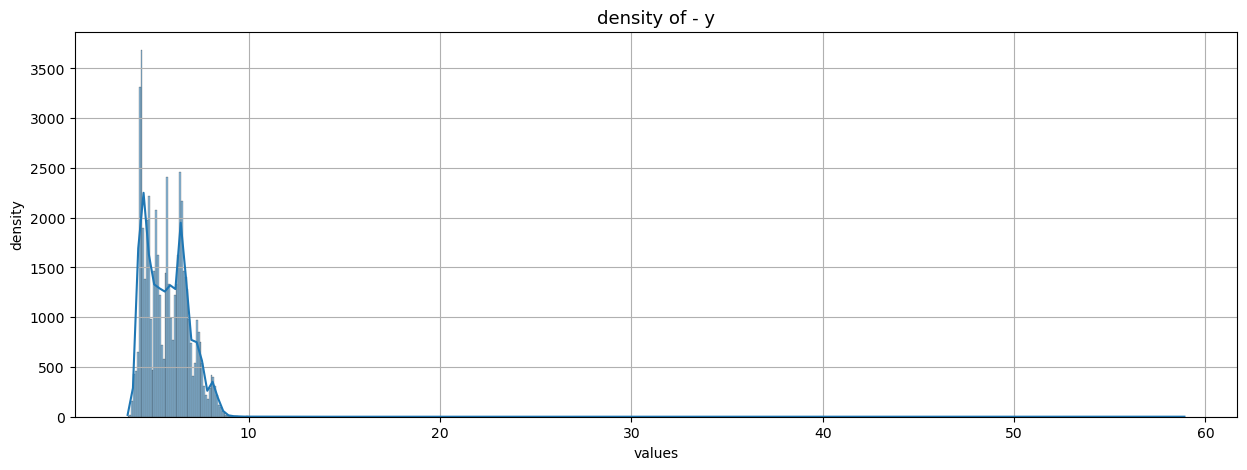

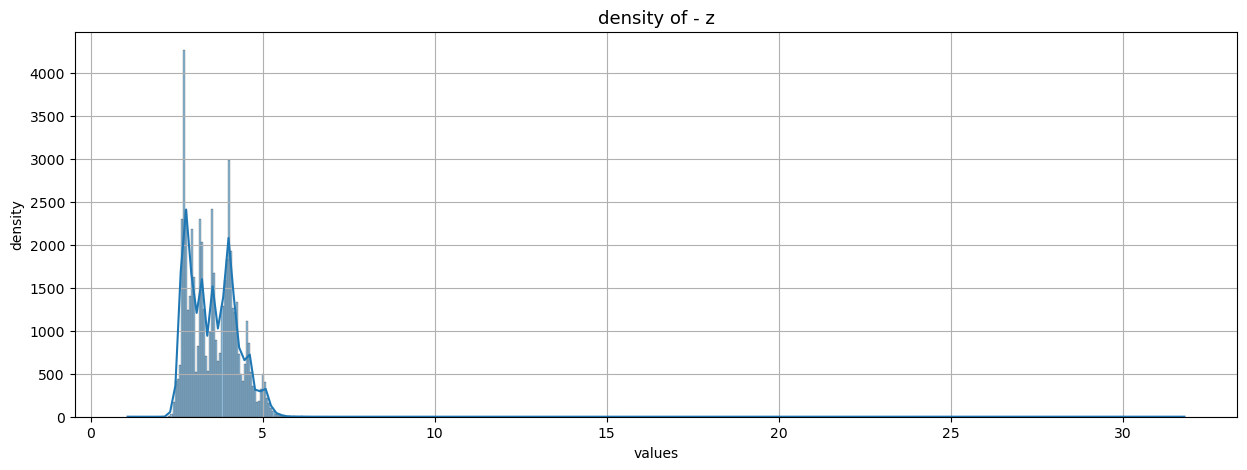

In [114]:
collist = data.columns[[0, 4, 5, 6, 7, 8 ,9]]
for i in collist:
    density(i)

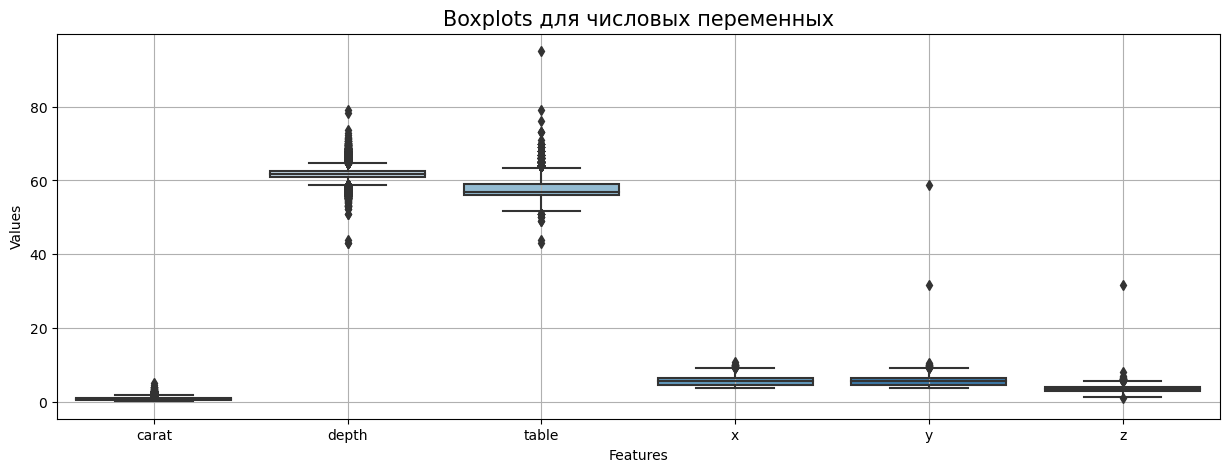

In [59]:
plt.figure(figsize = [15, 5])
sns.boxplot(data = data[['carat', 'depth', 'table', 'x', 'y', 'z']], palette="Blues")
plt.title('Boxplots для числовых переменных', fontsize = 15)
plt.grid()
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

* Посмотрели на то, как распределены данные, посмотрели на боксплоты, поняли, что присутствуют выбросы, которые могут серьезно повлиять на результаты модели, поэтому копируем на всякий случай датасет и идем бороться с выбросами.

In [115]:
data1 = data.copy()
data1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [116]:
data1_stat = data1.drop(columns = ['price', 'cut', 'color', 'clarity']).describe().T
data1_stat['iqr'] = data1_stat['75%'] - data_stat['25%']
data1_stat['lower_bound'] = data1_stat['25%'] - 2.5 * data1_stat['iqr']
data1_stat['upper_bound'] = data1_stat['75%'] + 2.5 * data1_stat['iqr']
data1_stat

,count,mean,std,min,25%,50%,75%,max,iqr,lower_bound,upper_bound
carat,53775.0,0.797536,0.473169,0.20,0.40,0.70,1.04,5.01,0.64,-1.200,2.640
depth,53775.0,61.748232,1.429639,43.00,61.00,61.80,62.50,79.00,1.50,57.250,66.250
table,53775.0,57.457806,2.233257,43.00,56.00,57.00,59.00,95.00,3.00,48.500,66.500
x,53775.0,5.731579,1.118611,3.73,4.71,5.70,6.54,10.74,1.83,0.135,11.115
y,53775.0,5.734909,1.139451,3.68,4.72,5.71,6.54,58.90,1.82,0.170,11.090
z,53775.0,3.539964,0.702017,1.07,2.91,3.53,4.03,31.80,1.12,0.110,6.830


In [117]:
data1_stat = data1_stat[['lower_bound', 'upper_bound']].T
data1_stat

,carat,depth,table,x,y,z
lower_bound,-1.20,57.25,48.5,0.135,0.17,0.11
upper_bound,2.64,66.25,66.5,11.115,11.09,6.83


In [118]:
data1.drop(data1[data1['carat'] > data1_stat.iloc[1]['carat']].index, inplace = True)
data1.drop(data1[(data1['depth'] < data1_stat.iloc[0]['depth']) | (data1['depth'] > data1_stat.iloc[1]['depth'])].index, inplace = True)
data1.drop(data1[(data1['x'] < data1_stat.iloc[0]['x']) | (data1['x'] > data1_stat.iloc[1]['x'])].index, inplace = True)
data1.drop(data1[(data1['y'] < data1_stat.iloc[0]['y']) | (data1['y'] > data1_stat.iloc[1]['y'])].index, inplace = True)
data1.drop(data1[(data1['z'] < data1_stat.iloc[0]['z']) | (data1['z'] > data1_stat.iloc[1]['z'])].index, inplace = True)
data1.drop(data1[(data1['table'] < data1_stat.iloc[0]['table']) | (data1['table'] > data1_stat.iloc[1]['table'])].index, inplace = True)

* работать с выбросами через IQR -> межквартильные размахи не особо сильно хотелось, поэтому в формулу вместо 1.5 решил подставить 2.5 'data1_stat['upper_bound'] = data1_stat['75%'] + 2.5 * data1_stat['iqr']' с целью того, чтобы не терять много данных

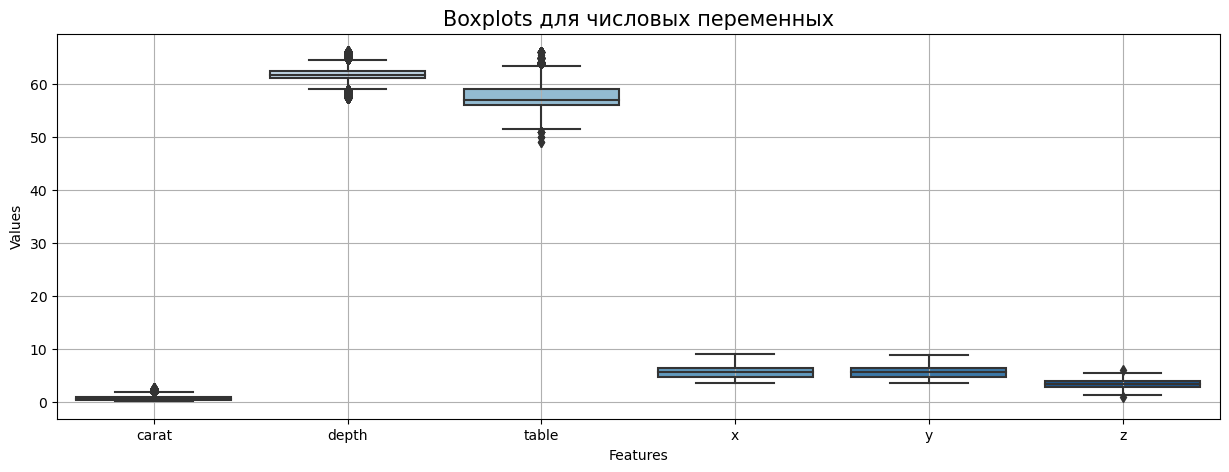

In [71]:
plt.figure(figsize = [15, 5])
sns.boxplot(data = data1[['carat', 'depth', 'table', 'x', 'y', 'z']], palette="Blues")
plt.title('Boxplots для числовых переменных', fontsize = 15)
plt.grid()
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

* Это наши боксплоты после очистки от выбросов, ситуация стала намного лучше, по сравнению с прошлым

In [78]:
from sklearn.preprocessing import LabelEncoder
LaE = LabelEncoder()

In [80]:
clmns = ['cut', 'color', 'clarity']
for col in clmns:
    data1[col] = LaE.fit_transform(data1[col])
data1.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53081.000000,53081.000000,53081.000000,53081.000000,53081.000000,53081.000000,53081.000000,53081.000000,53081.000000,53081.000000
mean,0.792501,2.582186,2.588817,3.849739,61.741893,57.419250,3918.898777,5.721685,5.724576,3.533047
std,0.466054,0.999130,1.700179,1.719746,1.290110,2.158861,3977.624860,1.113000,1.105541,0.686365
min,0.200000,0.000000,0.000000,0.000000,57.300000,49.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,1.000000,2.000000,61.100000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2393.000000,5.690000,5.700000,3.520000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5316.000000,6.530000,6.530000,4.030000
max,2.640000,4.000000,6.000000,7.000000,66.200000,66.000000,18823.000000,9.080000,9.010000,6.160000


* Для того чтобы закодировать категориальные признаки выбрал LabelEncoder, так как он довольно неплохо справляется со своей задачей

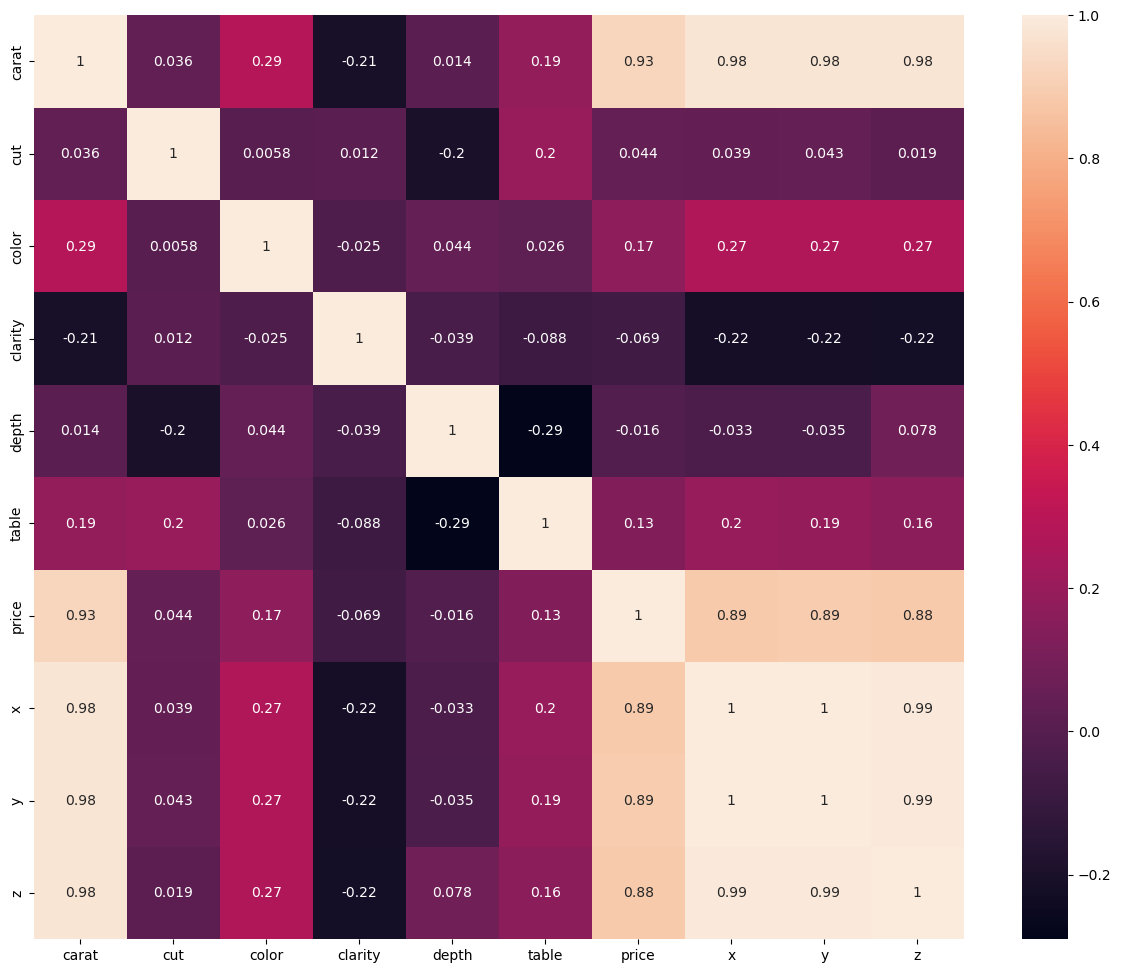

In [82]:
plt.figure(figsize = (15, 12))
sns.heatmap(data = data1.corr(), annot = True)
plt.show()

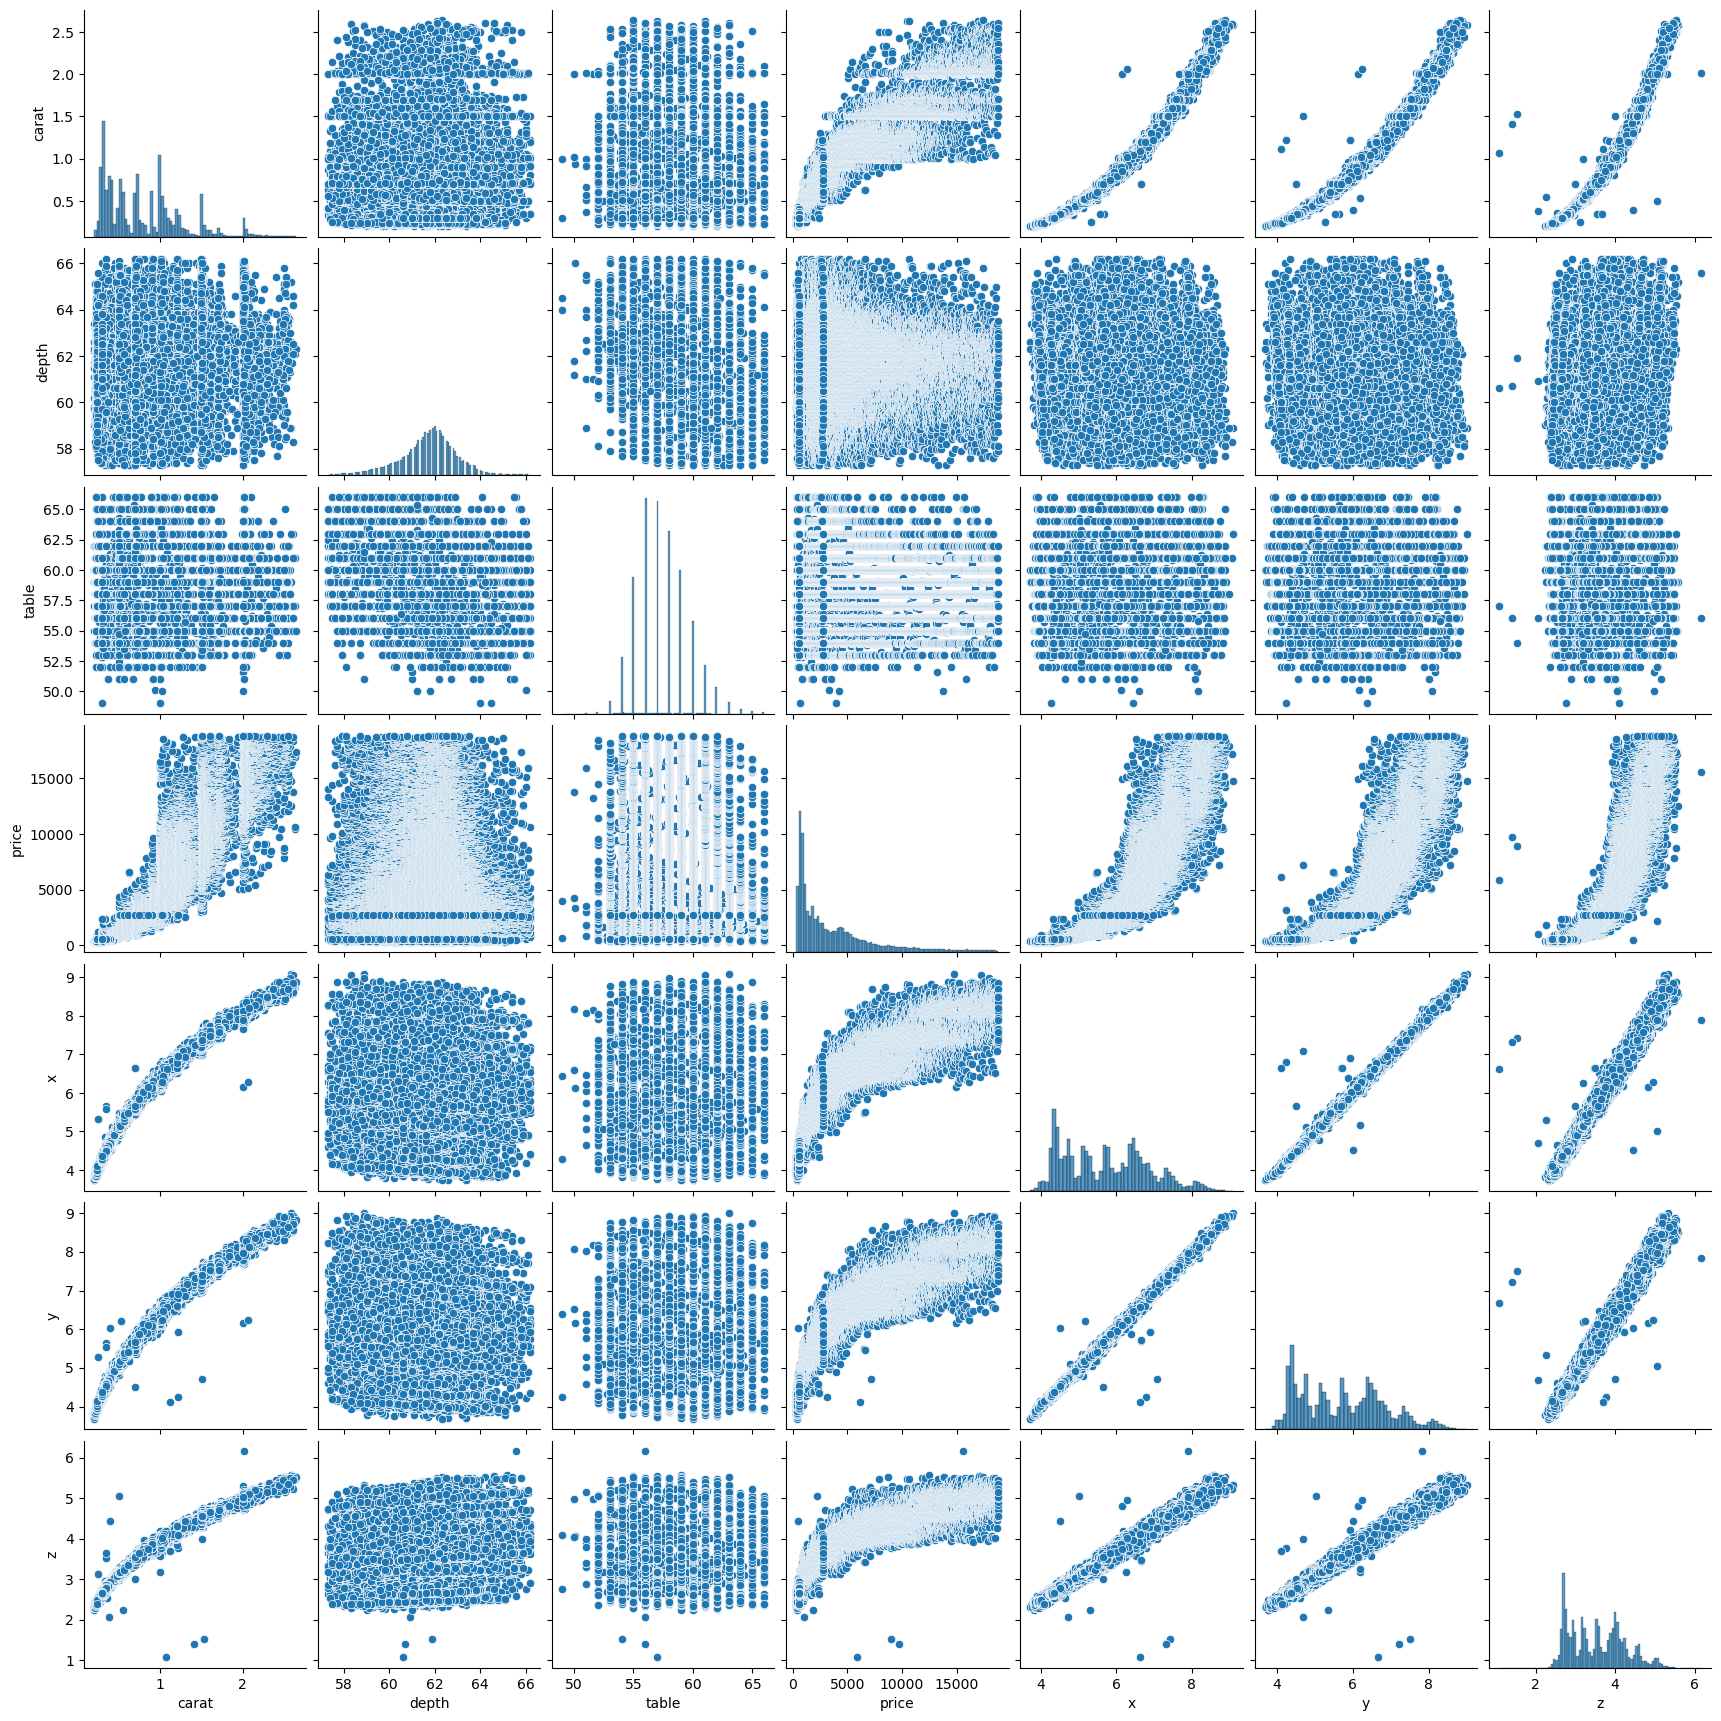

In [84]:
sns.pairplot(data = data1[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])
plt.show()

* Посмотрели на хитмапу и пайрплоты наших признаков, видно, что очень сильная корреляция между признаками x, y, z, и нашей целевой переменной - price. Это не есть хорошо, было бы лучше оставить один из этих признаков, так как матрица может оказаться близка к вырожденной и мы можем потерять интерепретируемость коэффицентов в линейной модели, но так как у нас в sklearn встроена регуляризация, можно оставить их.

In [99]:
X = data1.drop(["price"],axis =1)
y = data1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])

pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("kn",KNeighborsRegressor())])

pipeline_xgb=Pipeline([("scalar6",StandardScaler()),
                     ("xgb",XGBRegressor())])

pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest",4: "KNeighbors", 5: "XGBRegressor"}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [100]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 1275.056114 
Lasso: 1275.846556 
DecisionTree: 724.718626 
RandomForest: 539.831141 
KNeighbors: 813.301166 
XGBRegressor: 536.900257 


* Лучшее RMSE показал градиентный бустинг - XGBRegressor - 536

In [101]:
pred = pipeline_xgb.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R^2: 0.9812215892654289
Adjusted R^2: 0.9812056558538506


* r-квадрат получился равным 0.98, что является очень хорошим результатом